### Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Toolkits
Matplotlib ships with several add-on toolkits, including 3D plotting with mplot3d, axes helpers in axes_grid1 and axis helpers in axisartist.

Here is some of the functionality that seaborn offers:

* A dataset-oriented API for examining relationships between multiple variables

* Specialized support for using categorical variables to show observations or aggregate statistics

* Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data

* Automatic estimation and plotting of linear regression models for different kinds dependent variables

* Convenient views onto the overall structure of complex datasets

* High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations

* Concise control over matplotlib figure styling with several built-in themes

* Tools for choosing color palettes that faithfully reveal patterns in your data

In [20]:
#Importing seaborn Library
import seaborn as sns
import matplotlib.pyplot as plt

#We will be using Iris Dataset for visualisation
from sklearn import datasets  #importing dataset from sklearn library
iris = datasets.load_iris() #creating object

#We will be importing pandas library to create a dataframe 
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['target'] = pd.Series(iris.target)

The iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)
Classification is supervised learning in which the response is categorical
* "0": setosa
* "1": versicolor
* "2": virginica

In [21]:
#printing top 5 rows of the dataet
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
#Target variables
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

### 2-D Scatter Plot

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables

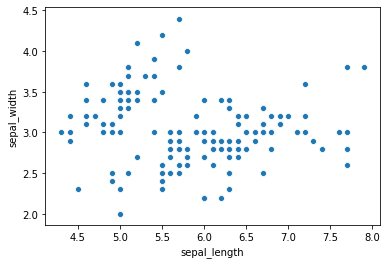

In [25]:
#Taking sepal_length on x and sepal width on y
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = iris_df)

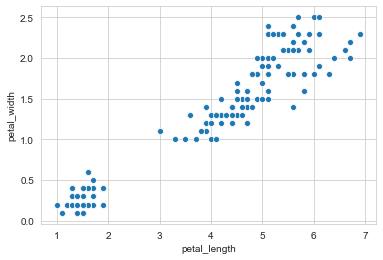

In [61]:
#Taking petal_length on x and petal_width on y
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris_df)

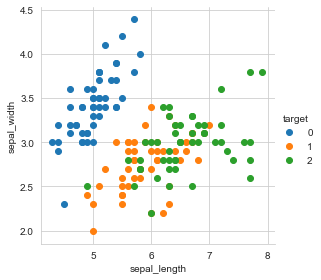

In [32]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 

sns.set_style("whitegrid");
sns.FacetGrid(iris_df, hue="target", size=4).map(plt.scatter, "sepal_length", "sepal_width") .add_legend();
plt.show();

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

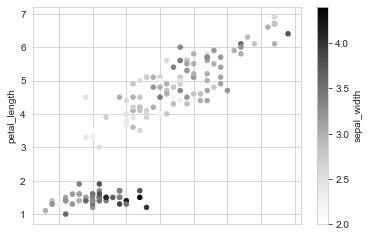

In [127]:
iris_df.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width')

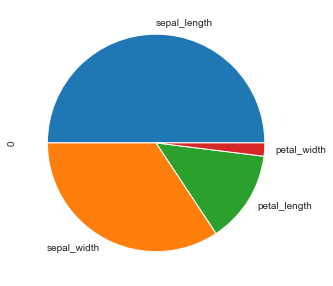

In [132]:
new_df = iris_df.drop(['target'],axis=1).iloc[0]
new_df.plot.pie(figsize = (5,5))

## Andrews curve

Andrews curve is a way to visualize structure in high-dimensional data. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothed version of a parallel coordinate plot. It is named after the statistician David F. Andrews.

Reference : https://en.wikipedia.org/wiki/Andrews_plot

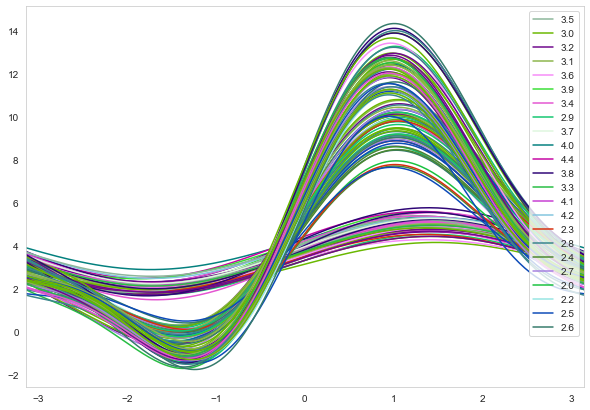

In [141]:
plt.figure(figsize=(10,7))
from pandas.plotting import andrews_curves
andrews_curves(iris_df, 'sepal_width')

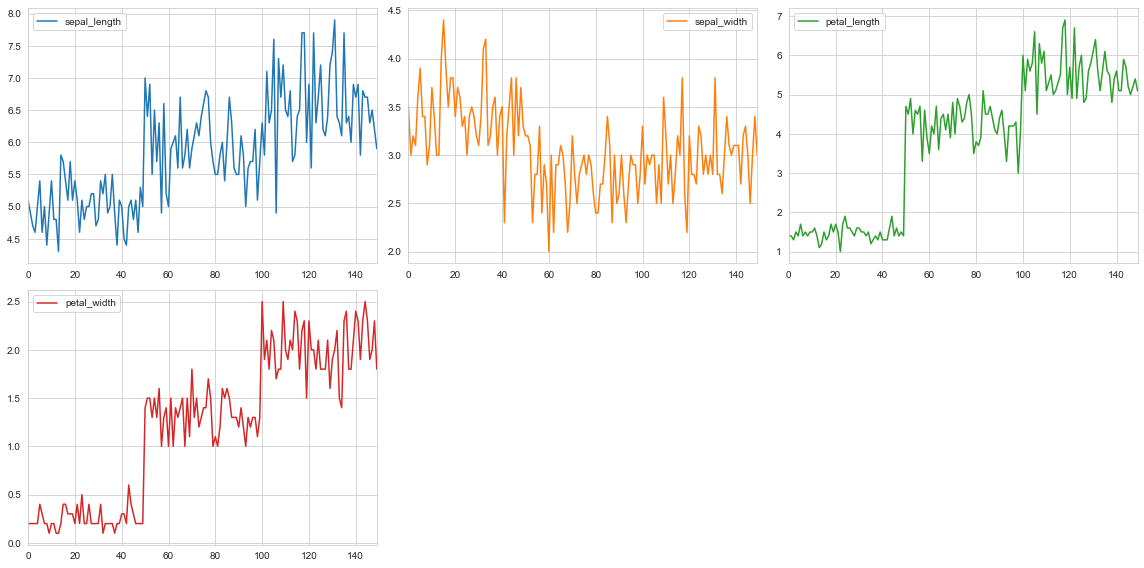

In [143]:
iris_df.drop(['target'],axis=1).plot(subplots = True, sharex = False, layout = (2,3), figsize = (16,8))
plt.tight_layout()

## Visualizing dataset structure

There are two other kinds of figure-level functions in seaborn that can be used to make visualizations with multiple plots. They are each oriented towards illuminating the structure of a dataset. One, jointplot(), focuses on a single relationship:

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins

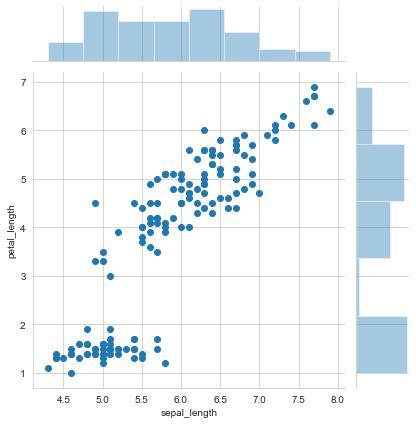

In [64]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris_df);

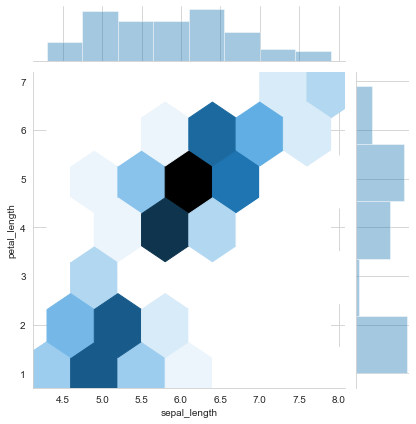

In [80]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris_df,kind='hex');

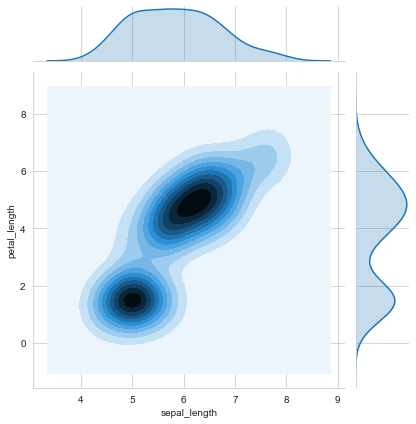

In [81]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris_df,kind='kde');

The other, pairplot(), takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable :

### Pair-plot

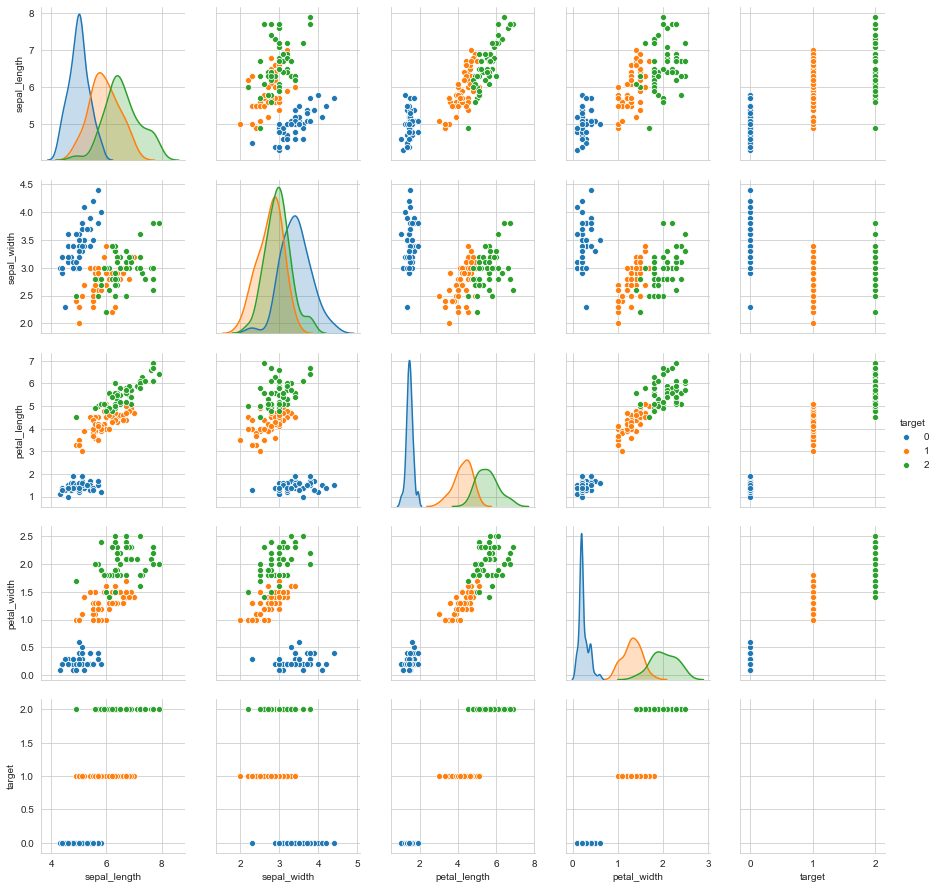

In [66]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

sns.pairplot(iris_df, hue="target");
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Box plot and Whiskers

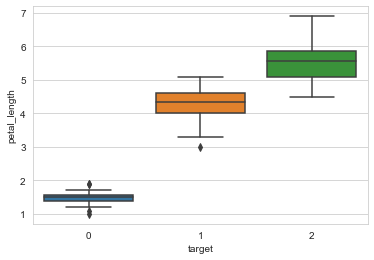

In [43]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
#Multi-variet
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='target',y='petal_length', data=iris_df)
plt.show()

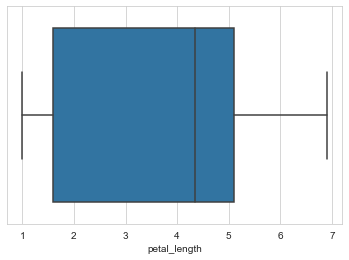

In [54]:
#Univariate Analysis
#Visualising Single feature
sns.boxplot('petal_length', data=iris_df)

## Histogram

Histogram is a graphical display of data using bars of different heights. It is similar to a Bar Chart, but a histogram groups numbers into ranges . The height of each bar shows how many fall into each range.

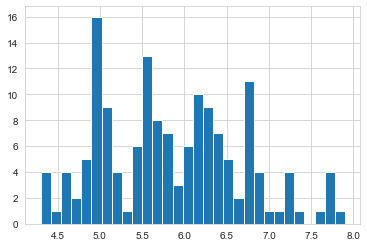

In [88]:
iris_df['sepal_length'].hist(bins=30)

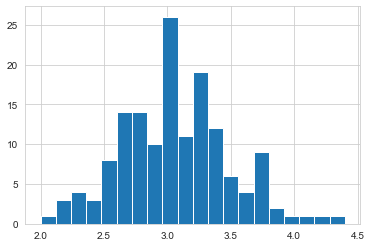

In [98]:
iris_df['sepal_width'].hist(bins=20)

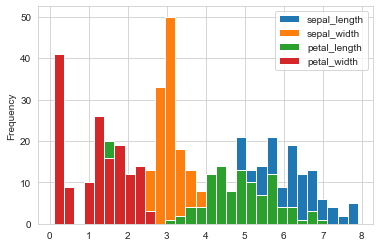

In [121]:
#Combined Histogram
iris_df.drop(['target'],axis=1).plot.hist(bins=30)

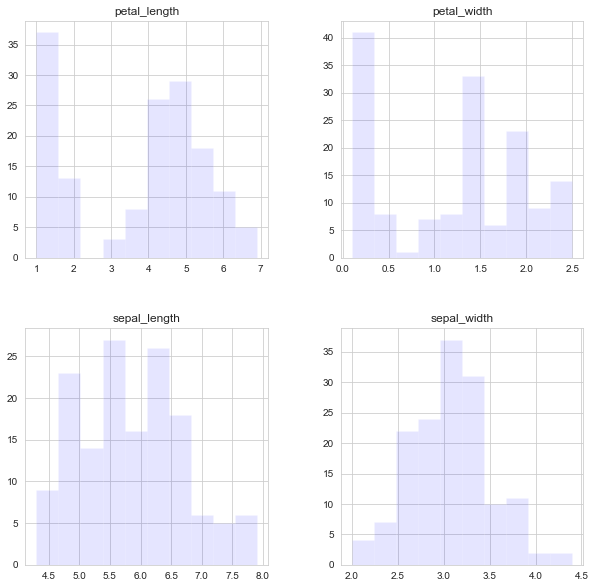

In [126]:
iris_df.drop(['target'],axis=1).hist(color = 'b', alpha = 0.1, figsize=(10,10));

### Violin plots

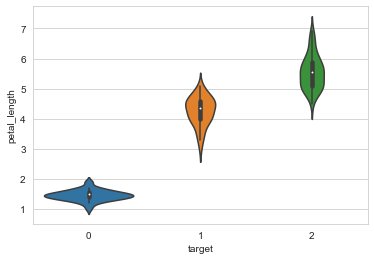

In [44]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="target", y="petal_length", data=iris_df, size=8)
plt.show()

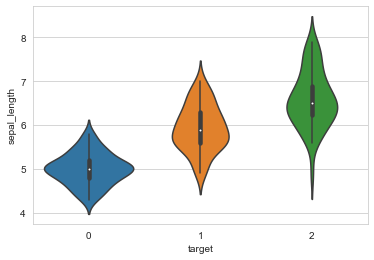

In [59]:
sns.violinplot(x="target", y="sepal_length", data=iris_df, size=10)
plt.show()

### Distribution Plot

A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. You can display this chart in three different ways, you can just have the value points displayed showing the distribution, or you can display the bounding box which shows the range or use a combination of both

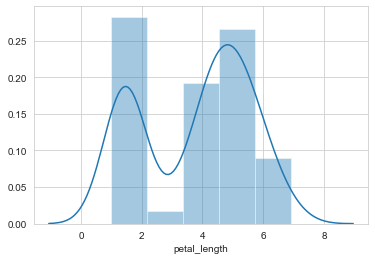

In [67]:
#it helps to check distribution of a column #Univariet
sns.distplot(iris_df['petal_length'])  

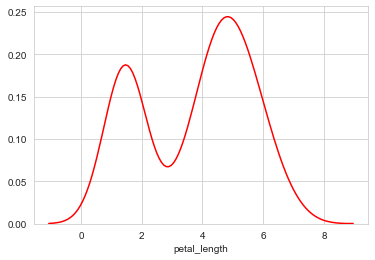

In [78]:
sns.distplot(iris_df['petal_length'],hist=False,color='red')

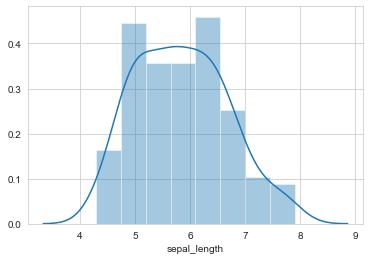

In [68]:
sns.distplot(iris_df['sepal_length']) 

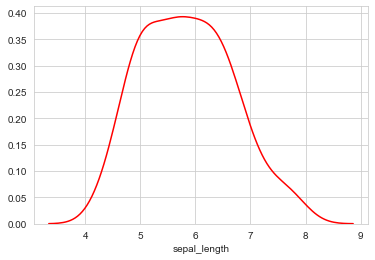

In [77]:
sns.distplot(iris_df['sepal_length'],hist=False,color='red')

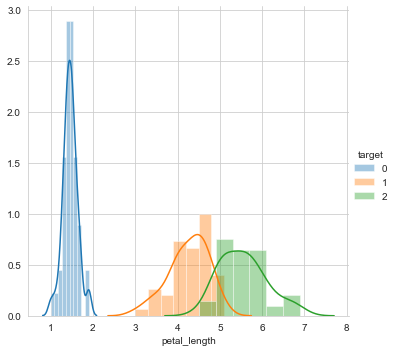

In [46]:
#Visualising Distributions #Multi-Variet
sns.FacetGrid(iris_df, hue="target", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

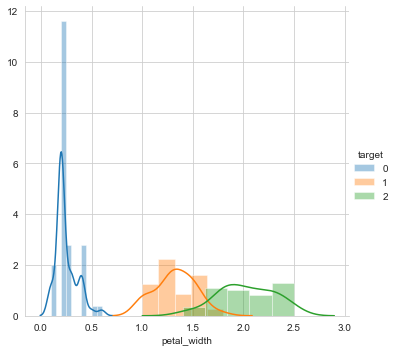

In [47]:
sns.FacetGrid(iris_df, hue="target", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

## Regression plots

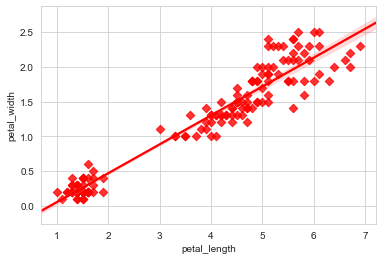

In [75]:
sns.regplot(x='petal_length',y='petal_width',data=iris_df,color='red',marker='D')

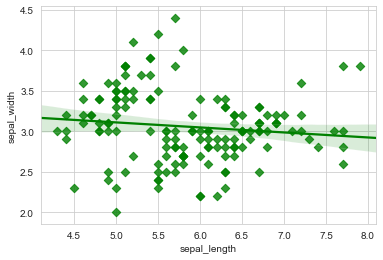

In [76]:
sns.regplot(x='sepal_length',y='sepal_width',data=iris_df,color='green',marker='D')

### For Categorical Data, We will be using Tips Dataset

In [100]:
#loading data
tips_df=sns.load_dataset("tips")

#top 5 data points
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar plot
A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

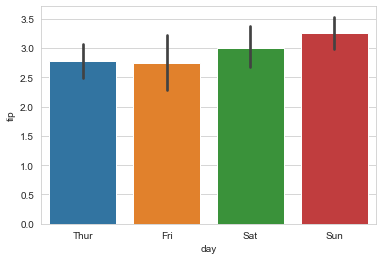

In [104]:
sns.barplot(x='day',y='tip',data=data)

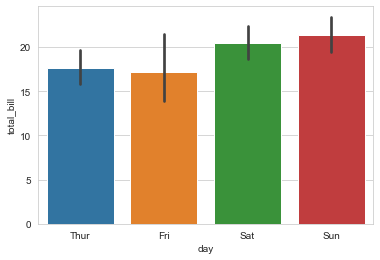

In [105]:
sns.barplot(x='day',y='total_bill',data=data)

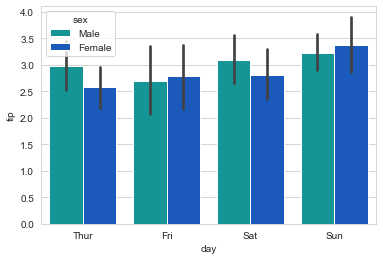

In [106]:
sns.barplot(x='day',y='tip',data=data,hue='sex',palette='winter_r')

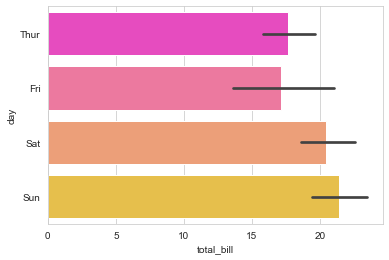

In [107]:
#horizontal bar plot
sns.barplot(x='total_bill',y='day',data=data,palette='spring')  #the black lines are error bars

### Count plot
A count plot can be thought of as a histogram across a categorical, instead of quantitative variable

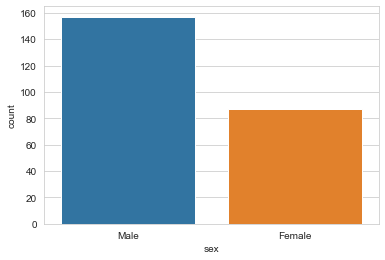

In [108]:
sns.countplot('sex',data=data)

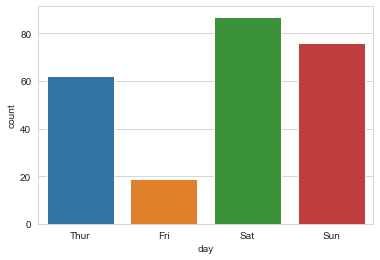

In [109]:
sns.countplot('day',data=data)

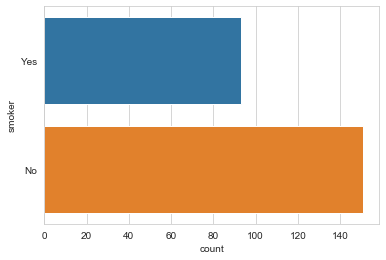

In [111]:
#horizontal countplot
sns.countplot(y='smoker',data=data)

### Boxplot

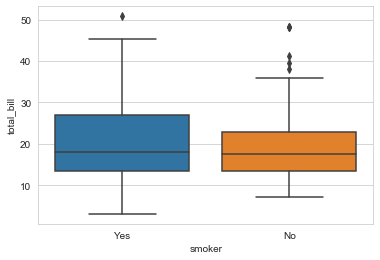

In [112]:
sns.boxplot('smoker','total_bill',data=data)

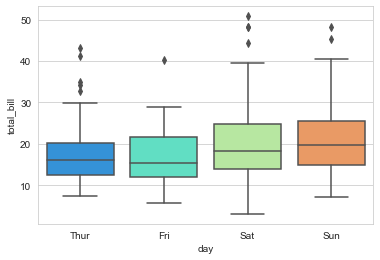

In [113]:
sns.boxplot('day','total_bill',data=data,palette='rainbow')

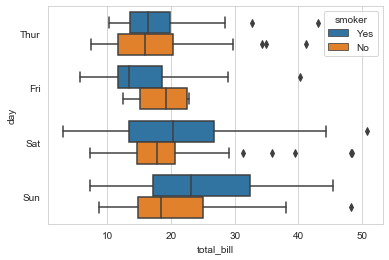

In [114]:
sns.boxplot(x='total_bill',y='day',data=data,hue='smoker')